In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('bank_debt_data.csv')
ds

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [4]:
ds1 =ds
ds1

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [5]:
ds1.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [6]:
ds1.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [7]:
msng_info = pd.DataFrame(ds1.isnull().sum()).reset_index()
msng_info

,index,0
0,id,0
1,expected_recovery_amount,0
2,actual_recovery_amount,0
3,recovery_strategy,0
4,age,0
5,sex,0


In [8]:
ds1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1877    False
1878    False
1879    False
1880    False
1881    False
Length: 1882, dtype: bool

In [9]:
ds1 = ds1.rename({'id':'ID', 'expected_recovery_amount':'Expected_Recovery_Amount', 'actual_recovery_amount':'Actual_Recovery_Amount', 'recovery_strategy':'Recovery_Strategy',
                   'age':'Age','sex':'Sex'},axis =1)
ds1

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [10]:
ds1.describe()

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [11]:
ds1.shape

(1882, 6)

In [12]:
ds1.corr(numeric_only= True)

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Age
ID,1.000000,-0.110098,-0.071510,-0.073001
Expected_Recovery_Amount,-0.110098,1.000000,0.903727,0.794451
Actual_Recovery_Amount,-0.071510,0.903727,1.000000,0.716007
Age,-0.073001,0.794451,0.716007,1.000000


In [13]:
ds1

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [14]:
ds1['Recovery_Strategy'].value_counts()#.plot.bar()

Recovery_Strategy
Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: count, dtype: int64

<Axes: xlabel='Recovery_Strategy'>

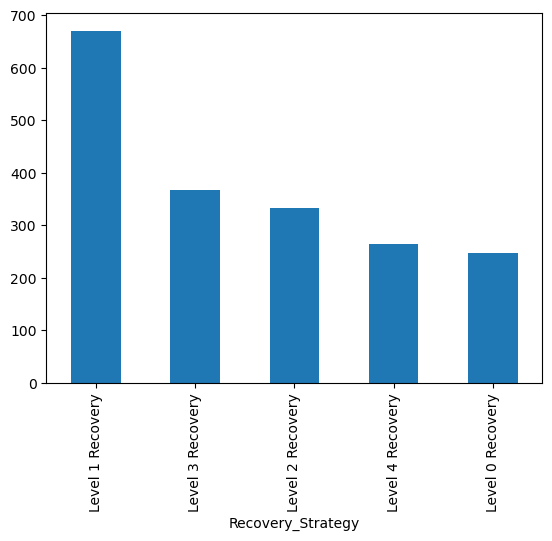

In [15]:
#Outlier Detection
ds1['Recovery_Strategy'].value_counts().plot.bar()

<Axes: ylabel='count'>

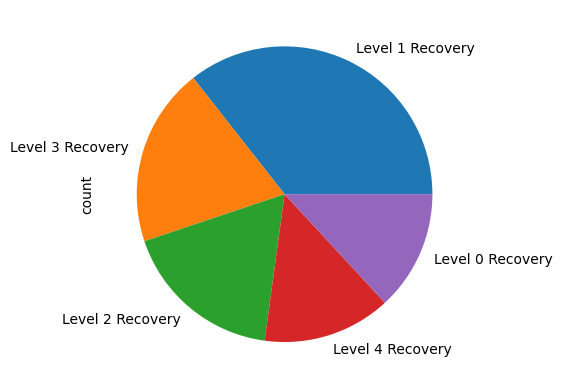

In [16]:
ds1['Recovery_Strategy'].value_counts().plot(kind='pie')

In [17]:
ds1['Sex'].value_counts()

Sex
Male      973
Female    909
Name: count, dtype: int64

In [18]:
ds2=ds1
ds2

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


## Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds2['Recovery_Strategy']=le.fit_transform(ds2['Recovery_Strategy'])
ds2['Sex'] = le.fit_transform(ds2['Sex'])

In [20]:
ds2

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex
0,2030,194,263.540000,0,19,1
1,1150,486,416.090000,0,25,0
2,380,527,429.350000,0,27,1
3,1838,536,296.990000,0,25,1
4,1995,541,346.385000,0,34,1
...,...,...,...,...,...,...
1877,361,9785,15388.195990,4,65,0
1878,196,9857,9709.909257,4,68,0
1879,313,9859,30209.181790,4,58,0
1880,1781,9920,20386.232190,4,67,0


In [21]:
ds2.corr()['Recovery_Strategy']

ID                         -0.125277
Expected_Recovery_Amount    0.906582
Actual_Recovery_Amount      0.801913
Recovery_Strategy           1.000000
Age                         0.801555
Sex                        -0.034651
Name: Recovery_Strategy, dtype: float64

In [22]:
ds2.reset_index()

,index,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex
0,0,2030,194,263.540000,0,19,1
1,1,1150,486,416.090000,0,25,0
2,2,380,527,429.350000,0,27,1
3,3,1838,536,296.990000,0,25,1
4,4,1995,541,346.385000,0,34,1
...,...,...,...,...,...,...,...
1877,1877,361,9785,15388.195990,4,65,0
1878,1878,196,9857,9709.909257,4,68,0
1879,1879,313,9859,30209.181790,4,58,0
1880,1880,1781,9920,20386.232190,4,67,0


## Scatter plot and Correlation analysis

C:\Users\sunie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sunie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sunie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sunie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

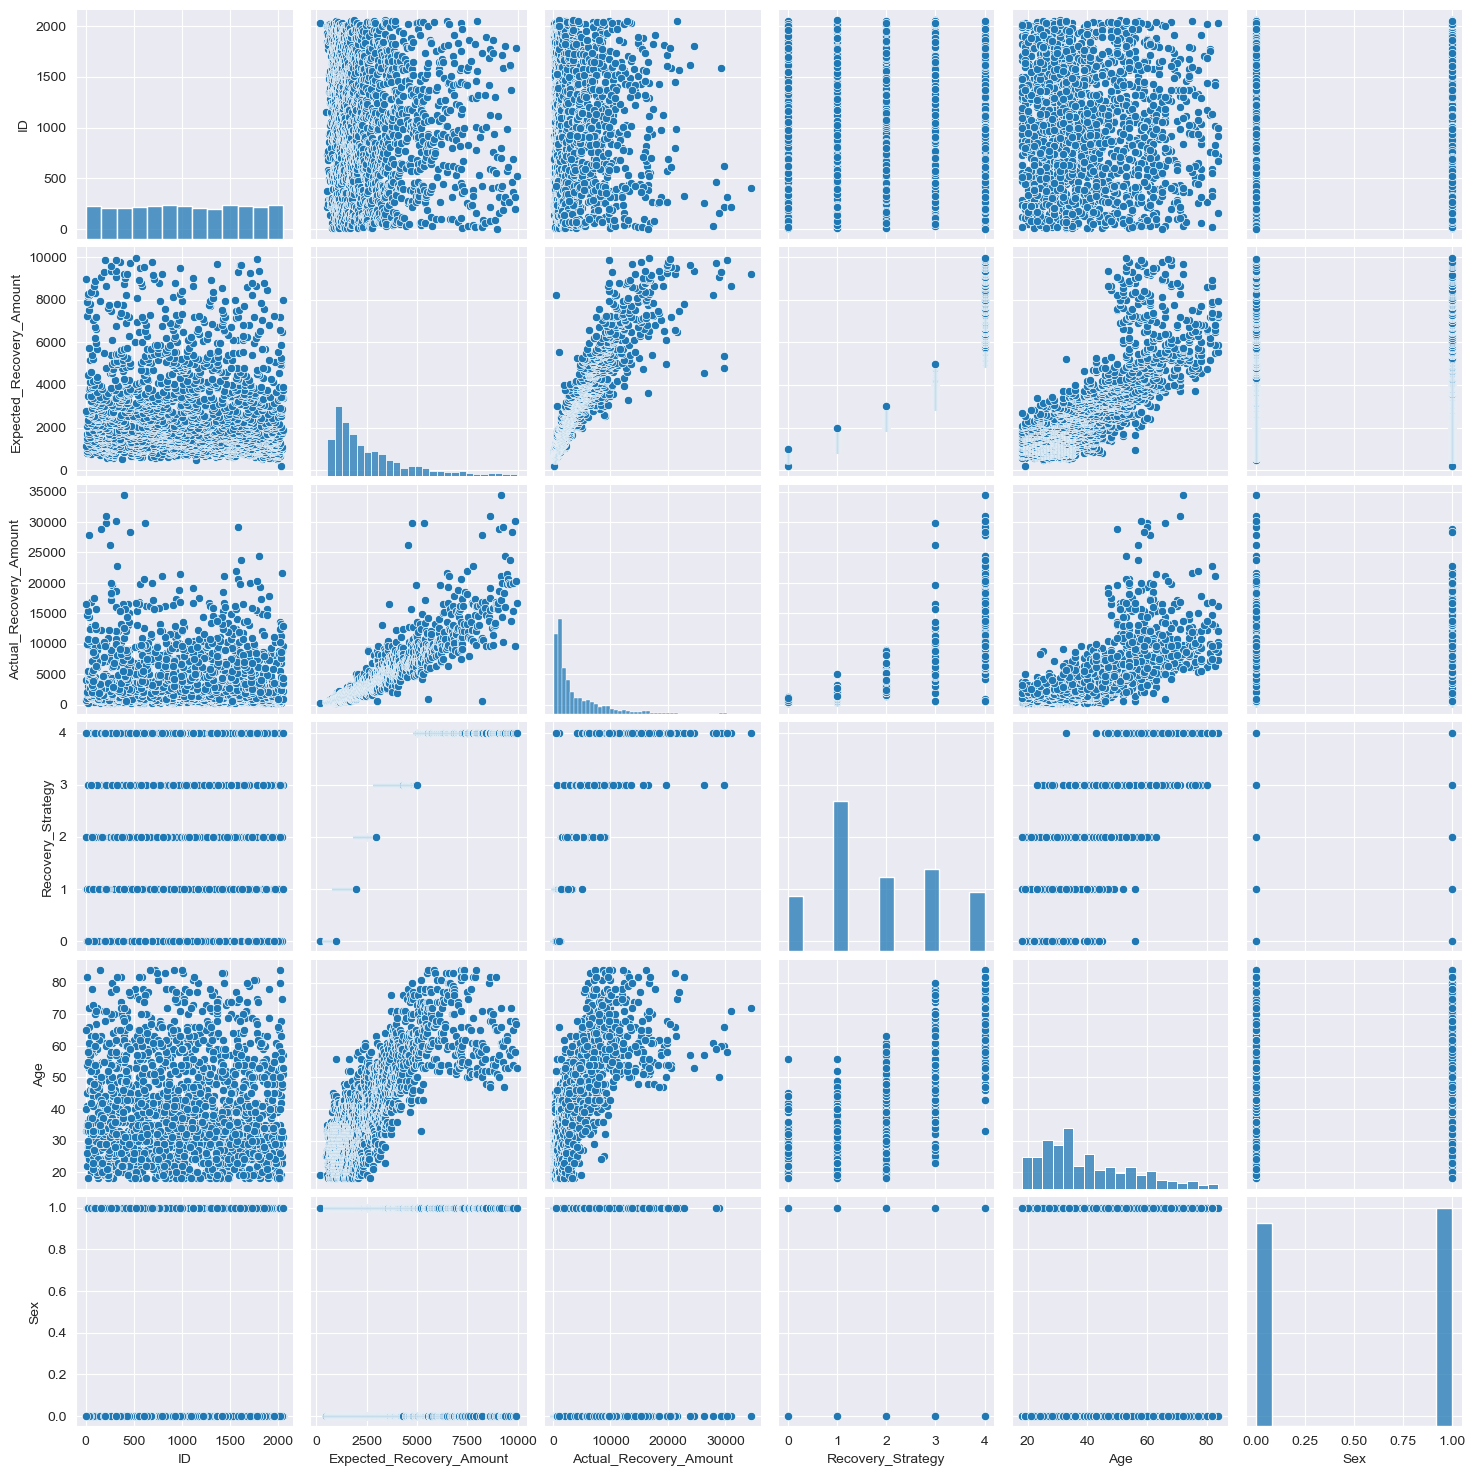

In [23]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(ds2)


In [24]:
ds2

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex
0,2030,194,263.540000,0,19,1
1,1150,486,416.090000,0,25,0
2,380,527,429.350000,0,27,1
3,1838,536,296.990000,0,25,1
4,1995,541,346.385000,0,34,1
...,...,...,...,...,...,...
1877,361,9785,15388.195990,4,65,0
1878,196,9857,9709.909257,4,68,0
1879,313,9859,30209.181790,4,58,0
1880,1781,9920,20386.232190,4,67,0


## Preparing a model

In [26]:
#Build model
import statsmodels.api as smf
import statsmodels.formula.api as smf 
model = smf.ols('Expected_Recovery_Amount~ID+Actual_Recovery_Amount+Recovery_Strategy+Age+Sex',data=ds2).fit()
model

In [ ]:
#~ meaning ?

In [27]:
#Coefficients B0 B1 B3 B4 B5
model.params

Intercept                 146.311705
ID                         -0.045023
Actual_Recovery_Amount      0.210750
Recovery_Strategy         712.617930
Age                        11.985302
Sex                        35.009090
dtype: float64

In [28]:
#t and p-Values
print(model.tvalues, '\n\n', model.pvalues)

Intercept                  2.847787
ID                        -1.911920
Actual_Recovery_Amount    40.847544
Recovery_Strategy         32.654539
Age                        7.829870
Sex                        1.264042
dtype: float64 

 Intercept                  4.450393e-03
ID                         5.603869e-02
Actual_Recovery_Amount    1.721603e-261
Recovery_Strategy         1.401777e-185
Age                        8.101832e-15
Sex                        2.063719e-01
dtype: float64


## R Squared

In [65]:
(model.rsquared,model.rsquared_adj)

(0.9125358589460821, 0.9123027455637422)

## Simple Linear Regression Models

In [31]:
ml_v=smf.ols('Expected_Recovery_Amount~Actual_Recovery_Amount',data = ds2).fit()  

#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept                 43.954164
Actual_Recovery_Amount    91.529594
dtype: float64 
 Intercept                 6.921256e-291
Actual_Recovery_Amount     0.000000e+00
dtype: float64


In [35]:
## Statistical test: sex vs. expected recovery amount


ml_w=smf.ols('Expected_Recovery_Amount ~ Sex',data = ds2).fit()  
print(ml_w.tvalues, '\n\n', ml_w.pvalues)  

Intercept    41.866134
Sex          -0.931790
dtype: float64 

 Intercept    3.215170e-271
Sex           3.515649e-01
dtype: float64


In [39]:
ml_w=smf.ols('Expected_Recovery_Amount ~ Sex+Age',data = ds2).fit()  
print(ml_w.tvalues, '\n\n', ml_w.pvalues)  

Intercept   -15.570707
Sex          -2.494865
Age          56.831029
dtype: float64 

 Intercept    1.649842e-51
Sex          1.268578e-02
Age          0.000000e+00
dtype: float64


In [40]:
ml_w=smf.ols('Recovery_Strategy ~ Expected_Recovery_Amount + Actual_Recovery_Amount',data = ds2).fit()  
print(ml_w.tvalues, '\n\n', ml_w.pvalues)  

Intercept                   10.218676
Expected_Recovery_Amount    43.838201
Actual_Recovery_Amount      -4.191689
dtype: float64 

 Intercept                    6.807805e-24
Expected_Recovery_Amount    9.455998e-290
Actual_Recovery_Amount       2.897409e-05
dtype: float64


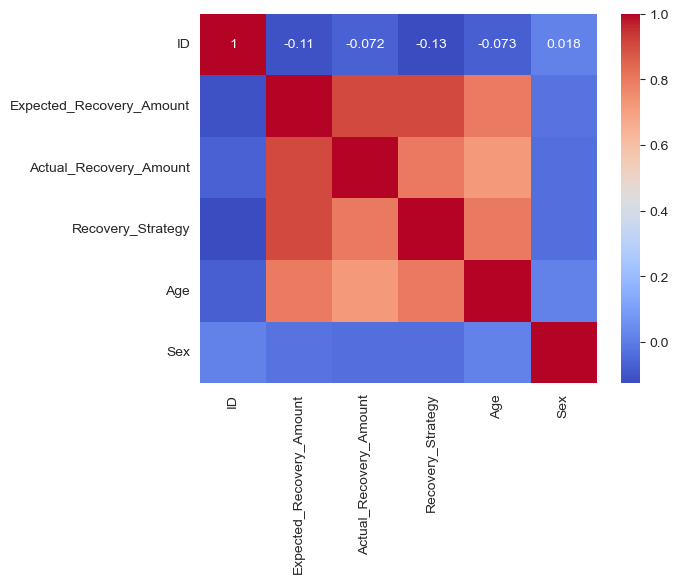

In [56]:
# Calculate the correlation matrix
corr_matrix = ds2.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

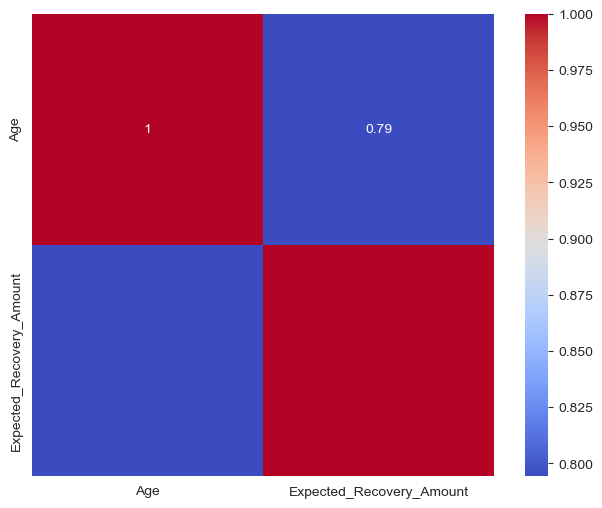

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(ds2[['Age','Expected_Recovery_Amount']].corr(),annot=True,cmap='coolwarm',square =True)
plt.show()

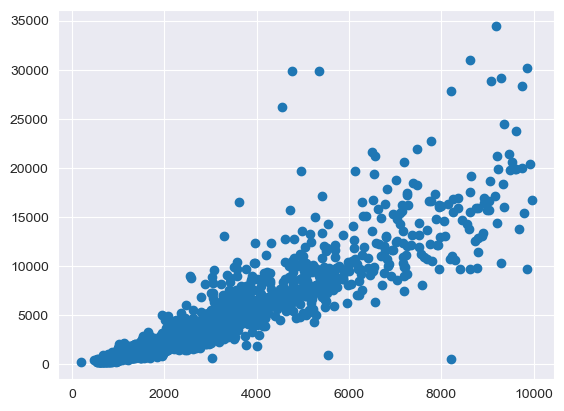

In [66]:
plt.scatter(ds2['Expected_Recovery_Amount'],ds2['Actual_Recovery_Amount'])

In [55]:
#Mean Imputation
mean = ds2['Recovery_Strategy'].mean()
print(mean)

1.8575982996811902


In [57]:
X = ds2.iloc[:,1:3]
y = ds2.iloc[:,0]
X

,Expected_Recovery_Amount,Actual_Recovery_Amount
0,194,263.540000
1,486,416.090000
2,527,429.350000
3,536,296.990000
4,541,346.385000
...,...,...
1877,9785,15388.195990
1878,9857,9709.909257
1879,9859,30209.181790
1880,9920,20386.232190


In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,y)


C:\Users\sunie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = classifier.predict(X)

y_pref_df = pd.DataFrame({'actual':y,'predicted_prob': y_pred})

In [60]:
y_pred

array([1730,  196,  196, ..., 1583, 1781,  522], dtype=int64)

In [61]:
y_pref_df

,actual,predicted_prob
0,2030,1730
1,1150,196
2,380,196
3,1838,921
4,1995,907
...,...,...
1877,361,361
1878,196,186
1879,313,1583
1880,1781,1781


In [62]:
len(y_pref_df[y_pref_df['actual']==1])

0

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
cm = confusion_matrix(y,y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
x=ds2[['Expected_Recovery_Amount']]
x

,Expected_Recovery_Amount
0,194
1,486
2,527
3,536
4,541
...,...
1877,9785
1878,9857
1879,9859
1880,9920


In [74]:
y=ds2[['Actual_Recovery_Amount']]
y

,Actual_Recovery_Amount
0,263.540000
1,416.090000
2,429.350000
3,296.990000
4,346.385000
...,...
1877,15388.195990
1878,9709.909257
1879,30209.181790
1880,20386.232190


In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [78]:
y_pre = lr.predict(X)
y_pre

array([[  263.54   ],
       [  416.09   ],
       [  429.35   ],
       ...,
       [30209.18179],
       [20386.23219],
       [16706.30592]])

In [81]:
ds2['pred'] = y_pre
ds2['error'] = ds2['Actual_Recovery_Amount']-ds2['pred']
ds2['squared'] = ds2['error']**2
ds2

,ID,Expected_Recovery_Amount,Actual_Recovery_Amount,Recovery_Strategy,Age,Sex,pred,error,squared
0,2030,194,263.540000,0,19,1,263.540000,3.979039e-13,1.583275e-25
1,1150,486,416.090000,0,25,0,416.090000,1.705303e-13,2.908057e-26
2,380,527,429.350000,0,27,1,429.350000,1.136868e-13,1.292470e-26
3,1838,536,296.990000,0,25,1,296.990000,0.000000e+00,0.000000e+00
4,1995,541,346.385000,0,34,1,346.385000,5.684342e-14,3.231174e-27
...,...,...,...,...,...,...,...,...,...
1877,361,9785,15388.195990,4,65,0,15388.195990,-1.818989e-12,3.308722e-24
1878,196,9857,9709.909257,4,68,0,9709.909257,-5.456968e-12,2.977850e-23
1879,313,9859,30209.181790,4,58,0,30209.181790,7.275958e-12,5.293956e-23
1880,1781,9920,20386.232190,4,67,0,20386.232190,3.637979e-12,1.323489e-23


In [93]:
sum(ds2['squared'])/10

3.4929518900577223e-22

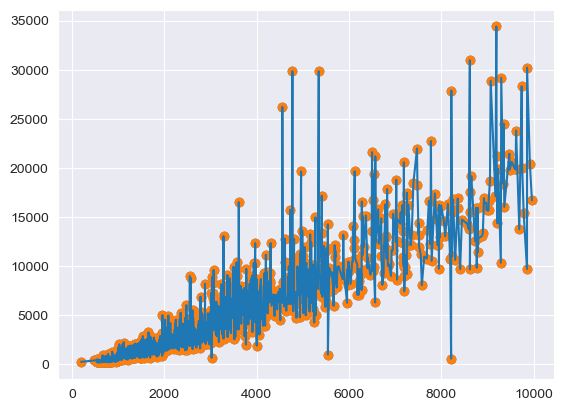

In [102]:

plt.scatter(ds2['Expected_Recovery_Amount'],ds2['Actual_Recovery_Amount'])
plt.scatter(ds2['Expected_Recovery_Amount'],ds2['pred'])
plt.plot(ds2['Expected_Recovery_Amount'],ds2['Actual_Recovery_Amount'])

In [109]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(ds2['Actual_Recovery_Amount'],ds2["pred"])


1.8559786875970895e-24

In [107]:
r2_score(ds2['Actual_Recovery_Amount'],ds2["pred"])

1.0